## Visualization

In [1]:
!pip install geemap folium google-cloud-storage rasterio matplotlib localtileserver ipyleaflet > /dev/null 2>&1

In [2]:
import ee
import geemap
import os
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import rasterio
import folium
from folium.plugins import TimeSliderChoropleth
from branca.colormap import LinearColormap

drive.mount('/content/drive')
work_dir = '/content/drive/MyDrive/UHI-Detection-Analysis/data/raw/'
os.makedirs(work_dir, exist_ok=True)


Mounted at /content/drive


In [4]:
ee.Authenticate()
ee.Initialize(project='manifest-pride-258211')

In [5]:
# Drive'dan TIFF dosyalarını yükle
lst_2015 = os.path.join(work_dir, 'LST_2015_Hamburg_test.tif')
lst_2025 = os.path.join(work_dir, 'LST_2025_Hamburg_test.tif')

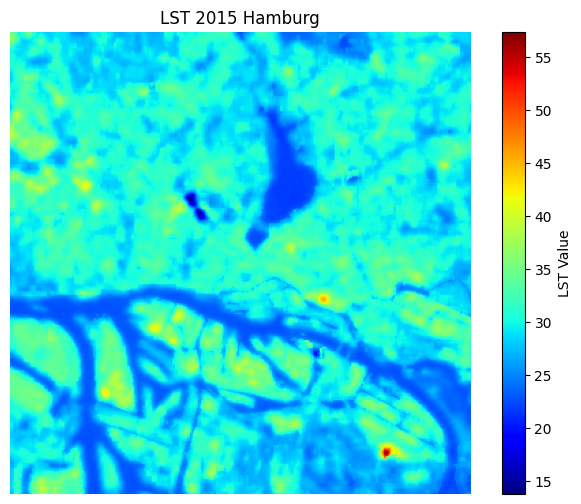

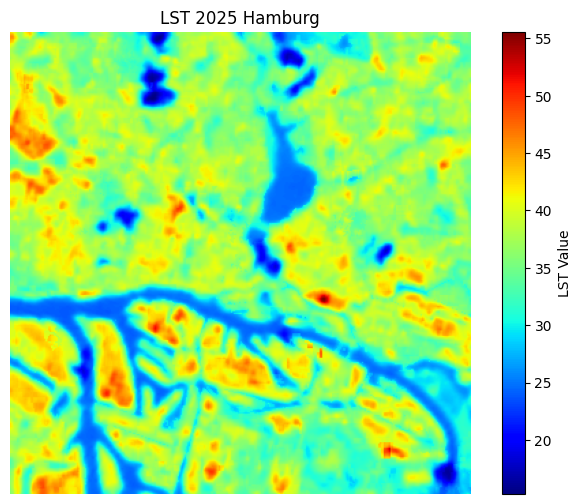

In [6]:
def plot_tiff(path, title):
    with rasterio.open(path) as src:
        arr = src.read(1)  # İlk bandı oku
        plt.figure(figsize=(8,6))
        plt.imshow(arr, cmap='jet')
        plt.colorbar(label='LST Value')
        plt.title(title)
        plt.axis('off')
        plt.show()

# 2015 dosyasını çiz
plot_tiff(lst_2015, 'LST 2015 Hamburg')

# 2025 dosyasını çiz
plot_tiff(lst_2025, 'LST 2025 Hamburg')

In [16]:
import os
import rasterio
import numpy as np
import folium
import matplotlib.pyplot as plt
from rasterio.warp import transform_bounds
from IPython.display import display

def tiff_to_rgb(path):
    with rasterio.open(path) as src:
        arr = src.read(1).astype(float)
        bounds = src.bounds
        src_crs = src.crs

        # Koordinatları WGS84'e dönüştür
        wgs_bounds = transform_bounds(src_crs, 'EPSG:4326', *bounds)

        # Normalize ve renk haritası
        arr = np.ma.masked_equal(arr, src.nodata)
        arr_min, arr_max = np.nanmin(arr), np.nanmax(arr)
        arr_norm = (arr - arr_min) / (arr_max - arr_min)
        arr_norm = np.clip(arr_norm, 0, 1)

        cmap = plt.get_cmap('jet')
        rgba_img = cmap(arr_norm)
        rgb = (rgba_img[:, :, :3] * 255).astype(np.uint8)

        return rgb, wgs_bounds

# TIFF dosyalarının yolları
tiff_2015 = os.path.join(work_dir, 'LST_2015_Hamburg.tif')
tiff_2025 = os.path.join(work_dir, 'LST_2025_Hamburg.tif')

# Görselleri yükle
rgb_2015, bounds_2015 = tiff_to_rgb(tiff_2015)
rgb_2025, bounds_2025 = tiff_to_rgb(tiff_2025)

# Harita merkezi
center_lat = (bounds_2015[1] + bounds_2015[3]) / 2
center_lon = (bounds_2015[0] + bounds_2015[2]) / 2

m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Katmanları ekle
folium.raster_layers.ImageOverlay(
    image=rgb_2015,
    bounds=[[bounds_2015[1], bounds_2015[0]], [bounds_2015[3], bounds_2015[2]]],
    opacity=0.8,
    name='LST 2015',
).add_to(m)

folium.raster_layers.ImageOverlay(
    image=rgb_2025,
    bounds=[[bounds_2025[1], bounds_2025[0]], [bounds_2025[3], bounds_2025[2]]],
    opacity=0.8,
    name='LST 2025',
).add_to(m)

# Katman kontrolü ve harita gösterimi
folium.LayerControl().add_to(m)
output_dir = '/content/drive/MyDrive/outputs'
os.makedirs(output_dir, exist_ok=True)


m.save('/content/drive/MyDrive/outputs/LST_Map.html')

In [17]:
display(m)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install nbstripout > /dev/null 2>&1

In [ ]:
nbstripout /content/drive/MyDrive/GitHub_Repos/urban-heat-island/notebooks/07_visualization_deploy.ipynb
